<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793506/blob/main/pre%20Actividad%20semanal%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


##Maestría en Inteligencia Artificial Aplicada
###Curso: Ciencia y analitica de datos
###Tecnológico de Monterrey
###Profesora: María de la Paz Rico Fernández
###Actividad de la Semana 7: Regresiones y Kmeans
###Nombre y matrícula: Erick Nájera Olivero - A01793506


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

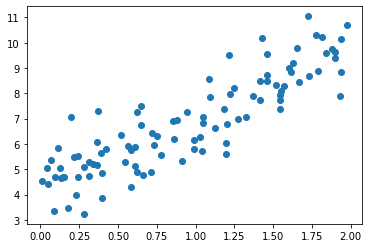

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,6.334288
1,9.405278
2,8.483724
3,5.604382
4,4.716440
...,...
95,6.146963
96,7.059295
97,6.906398
98,4.429206


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

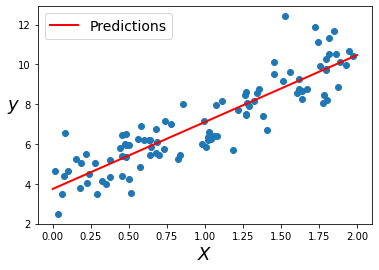

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

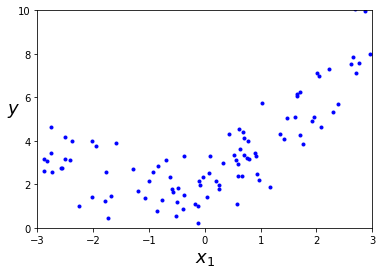

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.998940
1,4.320418
2,2.599923
3,2.175267
4,0.447174
...,...
95,0.565325
96,2.759217
97,3.314489
98,3.124415


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[-2.38324557]
[5.67985946]


In [ ]:
X_poly[0]

array([-2.38324557,  5.67985946])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.89643337, 0.48819444]]), array([2.09460069]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

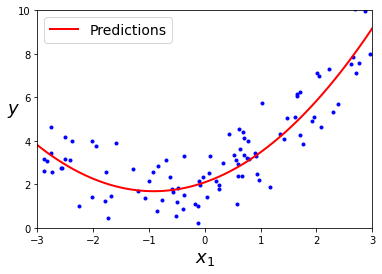

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
680,5.083549,38.094090
648,4.992818,33.948027
394,4.119537,56.980989
931,6.476508,30.222178
497,4.433310,29.824991
462,4.306285,41.262662
735,5.283807,28.928129
81,2.649751,52.882813
43,2.151590,52.029263
128,2.998296,42.393697


In [6]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [3]:
len(X)

1000

In [4]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

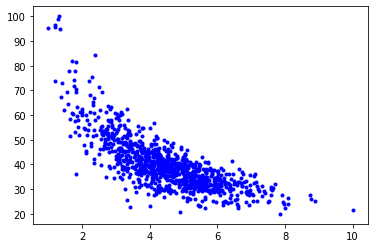

In [7]:
plt.plot(X,y,'b.')

Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

In [10]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings

El modelo generado es : [-5.98882699] 66.83650741226988
Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


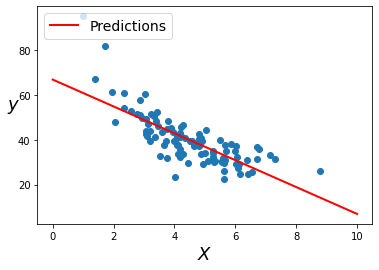

In [68]:
#lineal
#Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

# lista para guradar resultados MAE y R2
l_mae = list()
l_r2 = list()

#Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_fit = np.linspace(0, 10, 1000)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

print("El modelo generado es :", linear_reg.coef_, linear_reg.intercept_)

#Realizamos prediccion para conjunto test y guardamos en valor de mae,r2 en las listas
y_hat = linear_reg.predict(X_test)
lr_mae = metrics.mean_absolute_error(y_test, y_hat)
l_mae.append(lr_mae)
lr_r2 = r2_score(y_test, y_hat)
l_r2.append(lr_r2)

print('Error medio Absoluto (MAE):', lr_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score', lr_r2)

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

El modelo generado es : [-16.40638102   1.13136095] 88.80179909112496
Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068423
r2_score 0.7385501224942537


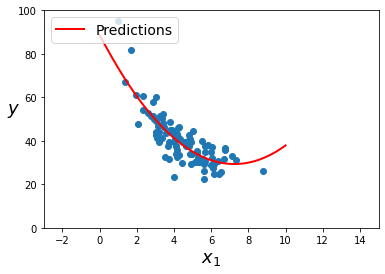

In [69]:
#polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

X_new=np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
yhat_RP = y_new

#realizamos prediccion para conjunto test y guardamos el valor de mae, r2 en las lista
xt_tr = poly_features.fit_transform(X_test)
y_hat = lin_reg.predict(xt_tr)
pr_r2 = r2_score(y_test, y_hat)
l_r2.append(pr_r2)

pr_mae = metrics.mean_absolute_error(y_test, y_hat)
l_mae.append(pr_mae)
print("El modelo generado es :",lin_reg.coef_, lin_reg.intercept_)
print('Error medio Absoluto (MAE):', pr_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score', pr_r2)

plt.scatter(X_test, y_test)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 15, 0, 100]);

El modelo generado es , [-5.95881467] 66.70224015626505

Error medio Absoluto (MAE): 5.017768641459566
Root Mean Squared Error: 7.1124406078632765
r2_score 0.6112451218497428


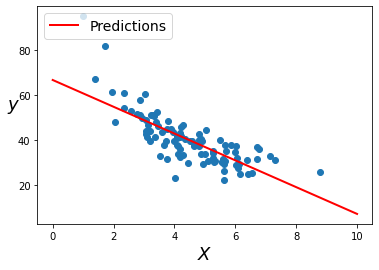

In [70]:
#Ridge
R_Ridge=Ridge(alpha = 8, solver = 'auto', random_state = 42)
R_Ridge.fit(X_train,y_train)
y_new=R_Ridge.predict(X_test)

X_new = np.linspace(0, 10, 100)
y_hat = R_Ridge.predict(X_new[:, np.newaxis])

#realizamos prediccion para conjunto test y guardamos el valor de mae en la lista
rr_mae =  metrics.mean_absolute_error(y_test, y_new)
l_mae.append(rr_mae)
rr_r2 = r2_score(y_test, y_new) 
l_r2.append(rr_r2)

print("El modelo generado es ," ,R_Ridge.coef_, R_Ridge.intercept_)
print('\nError medio Absoluto (MAE):', rr_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))
print('r2_score', rr_r2)

plt.scatter(X_test, y_test)
plt.plot(X_new, y_hat, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);



El modelo generado es , [-3.15572458] 54.16195119377413

Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score:  0.456505036516648


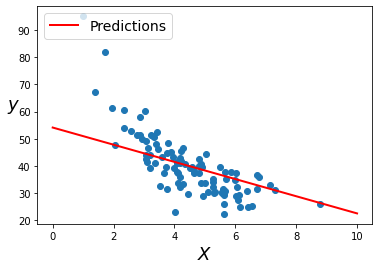

In [71]:
#Lasso
R_Lasso=Lasso(alpha = 5,  random_state = 42)
R_Lasso.fit(X_train,y_train)
y_new=R_Lasso.predict(X_test)

X_new = np.linspace(0, 10, 100)
y_hat = R_Lasso.predict(X_new[:, np.newaxis])
#yhat_LS = y_new

#realizamos prediccion para conjunto test y guardamos el valor de mae en la lista
rls_mae =  metrics.mean_absolute_error(y_test, y_new)
l_mae.append(rls_mae)
rls_r2 = r2_score(y_test, y_new)
l_r2.append(rls_r2)

print("El modelo generado es ," ,R_Lasso.coef_, R_Lasso.intercept_)
print('\nError medio Absoluto (MAE):', rls_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))
print('r2_score: ', rls_r2)

plt.scatter(X_test, y_test)
plt.plot(X_new, y_hat, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Metricas de erro MAE
[5.013587781954963, 4.3833025759681075, 5.017768641459566, 5.681207654677401]


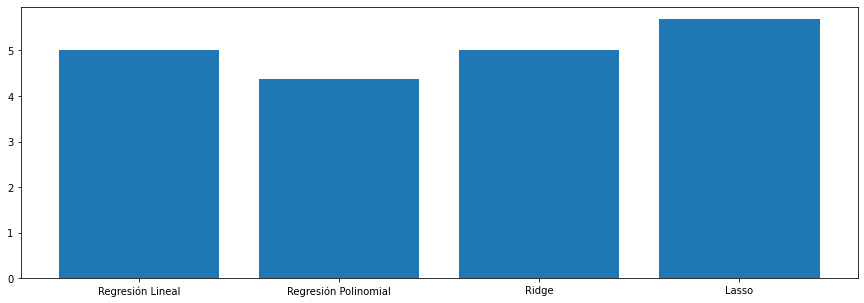

In [74]:
#Graficas MAE de los modelos
#Lista con los nombre de los modelos
Modelos = list()
Modelos.append('Regresión Lineal')
Modelos.append('Regresión Polinomial')
Modelos.append('Ridge')
Modelos.append('Lasso')

fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas de error MAE")
print(l_mae)
Metricas=list(Modelos)
l_mae=list(l_mae)
plt.bar(Metricas,l_mae)
plt.show()

Metricas R2
[0.6116251549562579, 0.7385501224942537, 0.6112451218497428, 0.456505036516648]


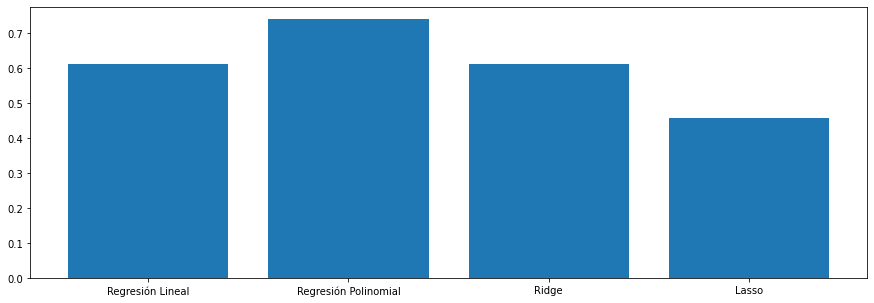

In [75]:
#Graficas R2 de los modelos
#Lista con los nombre de los modelos

fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas R2")
print(l_r2)
Metricas=list(Modelos)
l_r2=list(l_r2)
plt.bar(Metricas,l_r2)
plt.show()

In [11]:
warnings.filterwarnings('ignore')

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11552,4331000400,20150220T000000,252000.0,3,1.50,1150,13200,1.0,0,0,...,7,1150,0,1956,0,98166,47.4752,-122.345,1220,13066
8513,8731981500,20140818T000000,355000.0,4,1.75,2160,8000,1.0,0,0,...,9,1660,500,1976,0,98023,47.3165,-122.382,2350,8200
18918,8563000300,20140915T000000,675000.0,4,2.25,2260,8715,1.0,0,0,...,8,1530,730,1976,0,98008,47.6237,-122.106,2220,8650
9860,1081300390,20141030T000000,330000.0,3,1.75,2020,11050,1.0,0,0,...,8,1320,700,1969,0,98059,47.4706,-122.119,1940,11050
11063,6815100370,20141030T000000,845000.0,4,3.00,2390,4000,1.5,0,0,...,8,1460,930,1931,0,98103,47.6857,-122.331,1670,4000
18756,424069112,20140616T000000,999000.0,4,2.75,2800,19168,2.0,0,0,...,10,2800,0,1992,0,98075,47.5911,-122.037,2010,16020
4139,396100025,20140807T000000,339999.0,4,2.00,1740,6369,1.0,0,0,...,6,870,870,1954,0,98133,47.7461,-122.332,1560,7200
11191,7940710070,20140822T000000,394000.0,3,2.50,1370,4400,1.0,0,0,...,8,1370,0,1988,0,98034,47.7139,-122.203,1630,4400
1063,5706200060,20140818T000000,399950.0,3,1.00,1020,18050,1.0,0,0,...,7,1020,0,1969,0,98027,47.5254,-122.043,1750,11640
7655,7202340590,20141014T000000,702000.0,4,2.75,3880,15025,2.0,0,0,...,7,3880,0,2004,0,98053,47.6777,-122.035,2620,5300


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [78]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [79]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


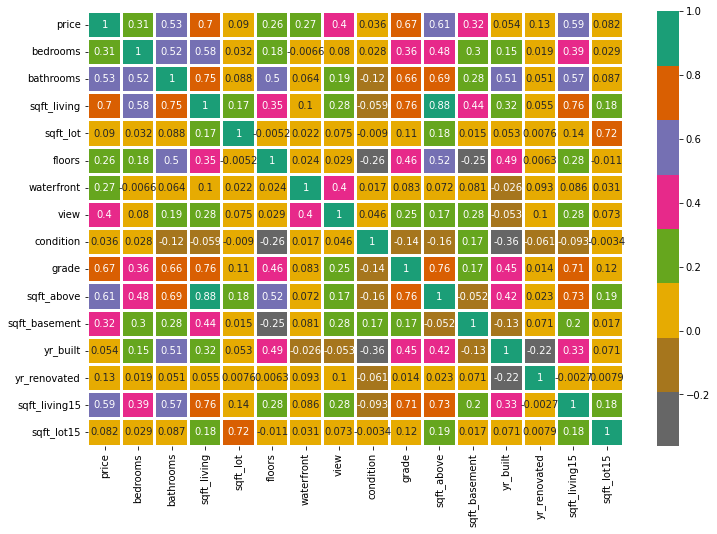

In [80]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [81]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [82]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [90]:
lm_mae= list()
lm_r2=list()

In [91]:
#Regresión Lineal Multiple

#Entenamos el modelo con conjunto de entranamiento
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)

#Calculamos MAE y Score con conjunto test - predicicones
y_hat = lin_reg.predict(X_test)
rl_mae = metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rl_mae)
rlm_r2=r2_score(y_test,y_hat)
lm_r2.append(rlm_r2)
print('\nError medio Absoluto (MAE):', rl_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score:', rlm_r2)


Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score: 0.6579723205007814


In [92]:
#regresion multiple polinomial
poly_transform = PolynomialFeatures(degree=2, include_bias = False)
x_fit = poly_transform.fit_transform(X_train)
rlp_reg = LinearRegression(fit_intercept=True)
rlp_reg.fit(x_fit, y_train)

#Calculamos MAE y Score con conjunto test - predicicones
x_fit2 = poly_transform.fit_transform(X_test)
y_hat = rlp_reg.predict(x_fit2)
rpm_mae=metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rpm_mae)
rpm_r2=r2_score(y_test,y_hat)
lm_r2.append(rpm_r2)

print('\nError medio Absoluto (MAE):', rpm_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score:',rpm_r2)


Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score: 0.7797929072570198


In [93]:
#regresion Ridge
Rid_reg=Ridge(alpha = 10, solver = 'auto', random_state = 42)
Rid_reg.fit(X_train,y_train)
y_hat=Rid_reg.predict(X_test)

#Calculamos MAE y Score con conjunto test - predicicones

rrm_mae=metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rrm_mae)
rrm_r2=r2_score(y_test,y_hat)
lm_r2.append(rrm_r2)
print('\nError medio Absoluto (MAE):', rrm_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score:', rrm_r2)


Error medio Absoluto (MAE): 137585.19973837206
Root Mean Squared Error: 232447.74672687982
r2_score: 0.6570452743997186


In [94]:
#Regresion lasso
LS_reg=Lasso(alpha = 10,random_state = 42, max_iter=100000)
LS_reg.fit(X_train,y_train)
y_hat=LS_reg.predict(X_test)

#Calculamos MAE y Score con conjunto test - predicicones

rlsm_mae=metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rlsm_mae)
rlsm_r2=r2_score(y_test,y_hat)
lm_r2.append(rlsm_r2)

print('\nError medio Absoluto (MAE):',rlsm_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score', rlsm_r2)


Error medio Absoluto (MAE): 137484.46604258215
Root Mean Squared Error: 232144.99192258206
r2_score 0.6579380649223465


Metricas de error MAE
[137480.1388273178, 121314.06948173394, 137585.19973837206, 137484.46604258215]


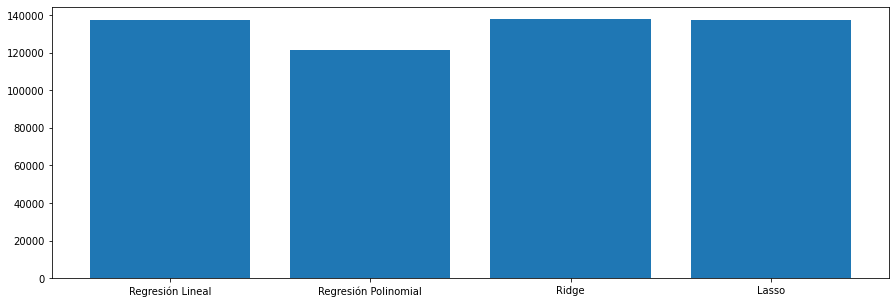

In [88]:
#Graficamos la metrica de error MAE
fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas de error MAE")
print(lm_mae)
Metricas=list(Modelos)
lm_mae=list(lm_mae)
plt.bar(Metricas,lm_mae)
plt.show()

Metricas R2
[0.6579723205007814, 0.7797929072570198, 0.6570452743997186, 0.6579380649223465]


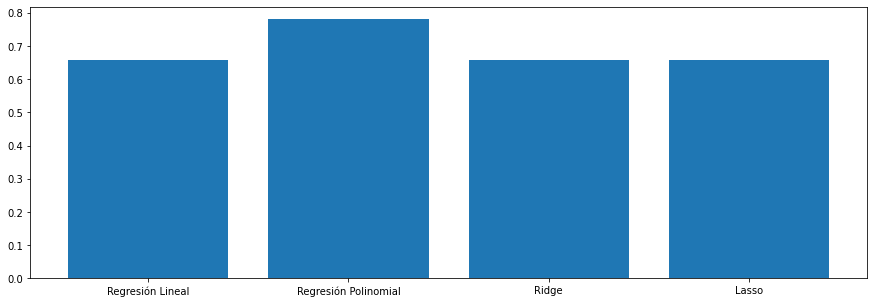

In [95]:
#Graficamos la metrica R2
fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas R2")
print(lm_r2)
Metricas=list(Modelos)
lm_r2=list(lm_r2)
plt.bar(Metricas,lm_r2)
plt.show()